<a href="https://colab.research.google.com/github/voquangtuong/AAA_drought_prediction/blob/main/aaa_code1_v%E1%BA%BD_b%E1%BA%A3n_%C4%91%E1%BB%93_%C4%91i%E1%BB%83m_ph%C3%A2n_t%C3%ADch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P1. install the nessary libraries

In [ ]:
import sys
import subprocess
import pkg_resources

required = {'geopandas','mapclassify','gdal','rasterio','rioxarray','contextily','matplotlib_scalebar','shapely'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

# import libaries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.tri import Triangulation, LinearTriInterpolator
import rasterio
import contextily as cx
# define cmap
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import numpy as np
from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry.point import Point

# connec GGD
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/hybrid_model')
outs=['fig']
for out in outs:
  if not os.path.exists(out):
    os.mkdir(out)

In [ ]:
# Vẽ lại hình 2 theo reviewer 2
# define cmap
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import numpy as np
# c0=gpd.read_file('input_shp/admininstration.shp')
# # c['COUNTRY']=c['Ten1']
# print(c0.crs)
# c = gpd.GeoDataFrame(c0, crs=4326)

In [ ]:
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTvMFeIRP5fIGlHpqBy_W8SqQjD5ZiD3pT0Ho1JHhQvPyTalX_l0rh6b1f2K9_TGQ/pub?output=csv'
df_name_pp=pd.read_csv(url,header=0)
df_name_pp['Idcode']=''
df_name_pp['Idcode'][0]='0000'+str(df_name_pp['Idpaper'][0])
for i in range(1,df_name_pp.shape[0]):df_name_pp['Idcode'][i]='000'+str(df_name_pp['Idpaper'][i])
print(df_name_pp)

    no  Idpaper       Name_pap   long  ... day        mon  years  Idcode
0    1       90         Sokcho  38°15  ...   1    January   1968  000090
1    2      100  Daegwallyeong  37°40  ...  11       July   1971  000100
2    3      101      Chuncheon  37°54  ...   1    January   1966  000101
3    4      105      Gangneung  37°45  ...   1    January   1911  000105
4    5      108          Seoul  37°34  ...   1    October   1907  000108
5    6      112        Incheon  37°28  ...  10      April   1904  000112
6    7      114          Wonju  37°20  ...   1  September   1971  000114
7    8      119          Suwon  37°16  ...   1    January   1964  000119
8    9      127        Chungju  36°58  ...   1    January   1971  000127
9   10      129         Seosan  36°46  ...   1    January   1968  000129
10  11      130          Uljin  36°59  ...   1    January   1971  000130
11  12      131       Cheongju  36°38  ...   1    January   1967  000131
12  13      133        Daejeon  36°22  ...   1    J

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# tao shapfile 59 zones


In [ ]:
df=pd.read_csv('input_csv/forcing_name2_NDI.txt',header=None)
# print(df)
arr=np.array(df)
station_name=[]
X=[]
Y=[]
Name=[]
for i in range(arr.shape[0]):
  station_name.append(arr[i,0][0:6])
  X.append(float(arr[i,0][18:25]))
  Y.append(float(arr[i,0][26:34]))
# create geopandas points
df_stations=pd.DataFrame({'Station':station_name,
                          'Latitude':X,
                          'Longitude':Y})

df_stations['Names']=''
for j in range(df_stations.shape[0]):
  for i in range(df_name_pp.shape[0]):
    if df_stations['Station'][j]==df_name_pp['Idcode'][i]:
      df_stations['Names'][j]=df_name_pp['Name_pap'][i]
print(df_stations)

   Station  Latitude  Longitude          Names
0   000090   38.2125   128.5875         Sokcho
1   000100   37.7125   128.7125  Daegwallyeong
2   000101   37.9625   127.7125      Chuncheon
3   000105   37.7125   128.8375      Gangneung
4   000108   37.5875   126.9625          Seoul
5   000112   37.4625   126.7125        Incheon
6   000114   37.3375   127.9625          Wonju
7   000119   37.2125   126.9625          Suwon
8   000127   36.9625   127.9625        Chungju
9   000129   35.7125   126.5875         Seosan
10  000130   36.9625   129.3375          Uljin
11  000131   36.5875   127.4625       Cheongju
12  000133   36.3375   127.3375        Daejeon
13  000135   36.2125   127.9625  Chupungnyeong
14  000138   36.0875   129.3375         Pohang
15  000140   35.9625   126.7125         Gunsan
16  000143   35.8375   128.5875          Daegu
17  000146   35.8375   127.2125         Jeonju
18  000152   35.5875   129.3375          Ulsan
19  000156   35.2125   126.8375        Gwangju
20  000159   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

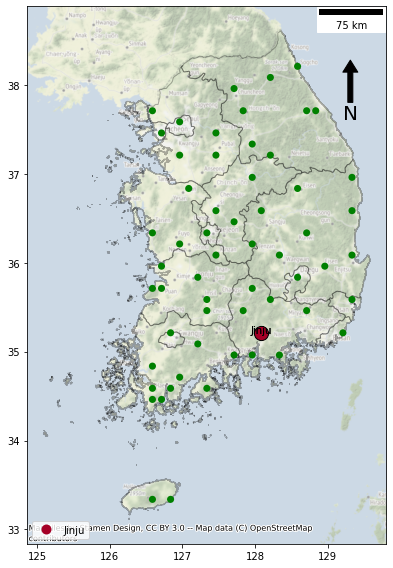

In [ ]:


gdf_stations=gpd.GeoDataFrame(df_stations,
                              geometry=gpd.points_from_xy(df_stations.Longitude,df_stations.Latitude),
                              crs={'init': 'epsg:4326'})

Jinju=gdf_stations[gdf_stations['Station']=='000192']
# set coordiate systems


fig,ax=plt.subplots(figsize=(6,8))


c0=gpd.read_file('input_shp/admininstrationWGS84.shp')
c0.plot(ax=ax,facecolor="none", alpha=0.3,
              edgecolor='black', lw=1)

# ve streetmap
cx.add_basemap(ax, crs=gdf_stations.crs,alpha=0.5)

# # ve legend cho cac vung
# c0.plot(figsize=(6, 8), alpha=0.3, edgecolor='k',column='NAME_1',cmap='RdYlGn',ax=ax,
#                         legend=True, \
#             legend_kwds={'loc':'lower left'})

# gdf_stations.plot(ax=ax)
# Jinju.plot(marker='*', color='red', markersize=50,alpha=0.99, edgecolor='k',column='Names',ax=ax)
# ve het may thang khac
# label Jinju

c=gdf_stations
c.plot(
    ax=ax,
    color='green',
    marker="o",
    markersize=50,
    edgecolor='none', # this modifies the color of the surrounding circle
    linewidth=1 # this modifies the width of the surrounding circle
)

# ve legend cho jinju

Jinju.plot(marker='o', markersize=200,alpha=1,edgecolor='k',column='Names',cmap='RdYlBu',
                        legend=True,
            legend_kwds={'loc':'lower left'},ax=ax)
# Jinju.plot(color='red',legend=True,ax=ax)
# 

# vẽ hoa gió
x, y, arrow_length = 0.9, 0.9, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)
# label Jinju
c=Jinju
c['coords'] = c['geometry'].apply(lambda x: x.representative_point().coords[:])
c['coords'] = [coords[0] for coords in c['coords']]
for idx, row in c.iterrows():
    plt.annotate(s=row['Names'], xy=row['coords'],
                 horizontalalignment='center')
    


c['coords'] = c['geometry'].apply(lambda x: x.representative_point().coords[:])
c['coords'] = [coords[0] for coords in c['coords']]
for idx, row in c.iterrows():
    plt.annotate(s=row['Names'], xy=row['coords'],
                 horizontalalignment='center')
    


# vẽ thước tỷ lệ
points = gpd.GeoSeries([Point(-73.5, 40.5), Point(-74.5, 40.5)], crs=4326)  # Geographic WGS 84 - degrees
points = points.to_crs(32619) # Projected WGS 84 - meters
distance_meters = points[0].distance(points[1])
ax.add_artist(ScaleBar(distance_meters,location='upper right'))
plt.tight_layout()
fig.savefig(outs[0]+'/'+'Injin.jpeg',dpi=300)


# gdf_stations.crs
# save to shapfile
# gdf_stations.to_file(outs[2]+'/'+'1981_01.shp') # hinh save dung toa do

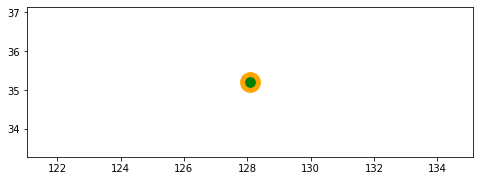

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
Jinju.plot(
    ax=ax,
    color='green',
    marker=".",
    markersize=1000,
    edgecolor='orange', # this modifies the color of the surrounding circle
    linewidth=5 # this modifies the width of the surrounding circle
)